# Introduction to dbt: 10 Must-Know Concepts For Data Engineers

## What is dbt and why should you care?

I have recently read somewhere on the Internet that the first data scientist a company hires becomes a data engineer. 

For the past few years, data science community has been slowly accepting data-centric paradigms. Instead of spending all resources on developing increasingly complex machine learning models, we are finally focusing on data quality. This gave rise to the massive popularity of data engineers. They are now earning salaries only given to skilled data scientists or ML engineers. 

And one tool that has significantly made data engineers' lives better is dbt (data build tool). Its purpose is to introduce the battle-tested software engineering best practices to data engineering and produce data value as quickly and easily as possible (make it less stupider and wordy).

This article will cover the fundamentals of dbt for entry-level data engineers seeking to add an indispensable tool to their belt. 

## Prerequisites

Only a few:
- __Basic to intermediate SQL__: if you know how to use the WHERE and GROUP BY clauses, you are good to go.
- __Familiarity in the terminal__: you should feel comfortable in the terminal, virtual environments and installing software with package managers like `pip` or `homebrew`. 
- __Basics of data warehouses__: fundamental knowledge of data engineering is a giant plus. It shouldn't be necessarily deep like you know [Kimball's four step process](https://campus.datacamp.com/courses/introduction-to-data-warehousing/data-warehouse-data-modeling?ex=5) but enough to infer some of the keywords.

If you can't meet these criteria and yet, your boss (or yourself) still requires you to learn dbt, you can use the following resources:

- [Intermediate SQL course](https://www.datacamp.com/courses/intermediate-sql)
- [Introduction to data engineering course](https://www.datacamp.com/courses/introduction-to-data-engineering)
- [Introduction to shell course](https://www.datacamp.com/courses/introduction-to-shell)



## What will this guide cover?

The open-source community loves dbt, so they managed to integrate it with nearly every tool that works with data. The result? A documentation so massive that even the quick start guides are larger than the docs of entire Python libraries. 

So, my goal with this article is to introduce you to seven core concepts of dbt with moderate technicality sprinkled in-between. After finishing the tutorial, you can go to any page of dbt docs and figure out what is going on. 

Now, let's dive right into it!

## 0. Data warehouse

The first concept we must familiarize ourselves is a data warehouse. A warehouse is where you store all data that belongs to some company. 

Companies build warehouses because they enable analytics and everything else you can do with data (ahem, structured data). They store historical data organized into tables and they are structured for fast querying and analysis. 

There are many tools that implement data warehouses:
- PostgreSQL
- MySQL
- Snowflake
- BigQuery
- Redshift

and so on. 

dbt can connect to all these tools and help you perform transformations on the data within. This means that to use dbt, you should already have a warehouse (a database) populated with data. 

dbt doesn't help you collect or load data but transform it. In other words, it does the T in the ETL/ELT process (extraction, transformation, load) that is at the heart of all warehouses. 

## 1. dbt Core vs. dbt Cloud

dbt is offered through two interfaces: __dbt Core__ and __dbt Cloud__.

dbt Core is an open-source library that implements most of the functionality of dbt. It has a command-line interface (the `dbt` command you will come to love) that you can use to manage data transformations in your projects. 

dbt Cloud is an enterprise solution for teams. On top of the CLI, dbt Cloud also provides a more user-friendly web-based IDE. With it, you don't have to worry about database connections and editing YAML files so much (as you will see in the coming sections). 

dbt Cloud also offers additional features like job scheduling, advanced integrations and high priority support. 

Here is a table summarizing the differences between dbt Core and dbt Cloud:

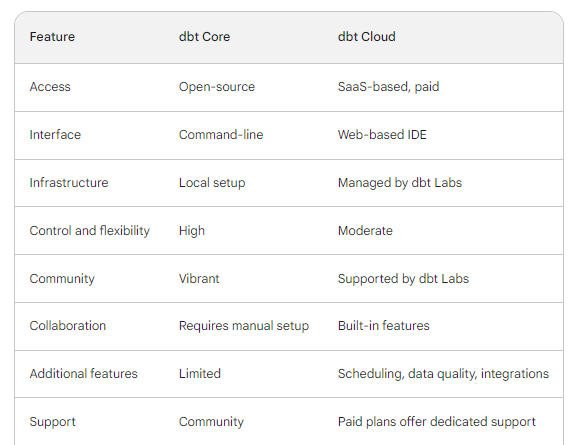

Despite the additional features, we will cover dbt Core as it is best suited for local projects, testing and learning. You can install it with `pip` on any OS (inside a virtual environment, of course). 

I will use a Conda environment:

```
$ conda create -n learn_dbt -y
$ pip install dbt-<adapter_name>
```

You should replace `adapter_name` with the database you want to use. dbt Labs (the company behind dbt) has integrated many adapters for different data platforms. 

In this article, we will use `dbt-duckdb` that let us connect to a DuckDB database. But you can use any of the adapters listed on [this page of dbt docs](https://docs.getdbt.com/docs/core/connect-data-platform/about-core-connections).

```
$ pip install dbt-duckdb
```

That's it for initial setup!

## 2. dbt Projects

Basically, a dbt project is a directory on your machine containing everything required to perform transformations on your data. It contains lots of `.sql` files (called models) and YAML files (profiles and configuration). 

To create a dbt project, you can use the `dbt init <project_name>` command on the CLI:

```
$ dbt init dbt_learn
```

The terminal asks you to enter a code that corresponds to your available data platform adapters. Since you only have DuckDB, you can press 1. 

```
$ cd dbt_learn
```

Inside `dbt_learn`, you have the following structure:

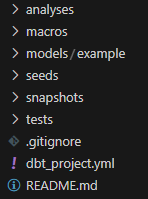

This is where data engineers become software engineers because dbt projects let you:
- __Organized and modular__: keep your data transformations organized and separated into manageable units, making your code easier to understand and maintain.
- __Version control__: track changes and revert to previous versions of your models, ensuring data consistency and reproducibility.
- __Collaboration__: add multiple users who can work on the same project with defined roles and permissions, fostering data democratization.
- __Testable__: write tests for your models to ensure they work as expected and identify potential issues before deploying them to production.
- __Repeatable__: use the same project for consistent data transformations across different data sources and environments.

In short, dbt projects offer a powerful way to manage and orchestrate data transformations. They bring the long-awaited benefits of software engineering to the data world. 

## 3. dbt Project profiles

We've initialized a dbt project and now, we need to connect to an existing database (or create one from scratch). To do this, we need a secure way to feed database credentials to dbt to establish a connection. This is where we will use a project profile.

A project profile is a YAML file containing the connection details for your chosen data platform. The file itself is created in the `.dbt` directory in $HOME and is named `profiles.yml`. Here is what it looks like:

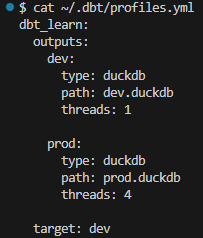

The file lists a single profile named `dbt_learn` for our project. It specifies two outputs: `dev` and `prod`. 

Within a dbt profile, outputs are individual configurations that specify different connections to data warehouses or databases. Through outputs, you can manage connections to different environments:

- Development
- Testing
- Production

In our profile, our default output is `dev`, which is listed in the `target` field. You can change it to any other output based on your needs. For now, we leave it as it is. 

> Note: you can change the profile and output names as long as they are correctly references in the rest of the dbt files. 

The `path` field specifies the location of an existing database called `dev.duckdb`. If it doesn't exist, it will be created by dbt DuckDB adapter in our working directory (inside `dbt_learn` project; the `path` field specifies relative paths to the project directory). Since we don't have a database called `dev.duckdb`, we will let dbt create it for us by running `dbt debug`.

```
$ dbt debug
```

The `debug` sub-command is used to test many aspects of the project such as:

- Errors in `profiles.yml` file
- Database connection details in `profiles.yml`
- The database adapter
- Errors in `dbt_project.yml` file and so on. 

If you received a green "All tests passed" message and a new `dev.duckdb` database appeared, then you are good to go.

## 4. dbt Models

Models are the heart of dbt as they represent the actual transformations dbt is famous for. 

A data model is a conceptual idea that represents the structure and relationships within a set of data. Data models in dbt are simpler and more specific. They have the following attributes:
- Represent a data transformation (like performing a cleaning operation)
- Typically written with SQL in `.sql` files (Python is allowed in newer versions of dbt)
- Usually consists of one SELECT query

Our `dbt_learn` project comes pre-populated with two dummy models inside `models/example`:

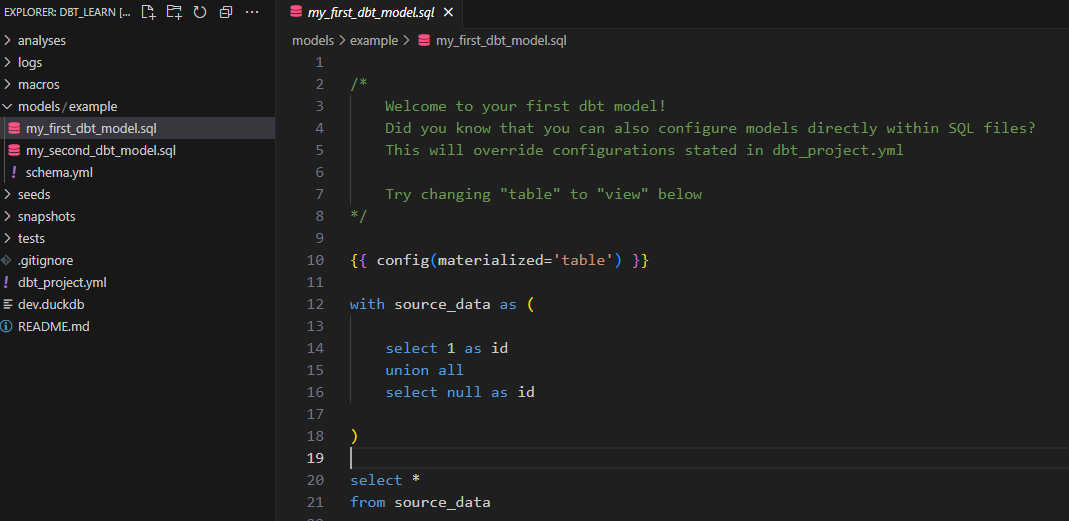

We will delete them and create our own:

```
$ rm -rf models/example
$ mkdir models/stats
$ touch models/stats/average_diamond_price_per_group.sql
```

In the last line of the above code snippet, we are creating a model named `average_diamond_price_per_group` inside `stats` directory. It is important to be descriptive in model names.

Inside the model (`.sql` file), paste this dummy test SQL query:

```SQL
SELECT 1 AS Id
```

and run the model with `dbt run`:

```
$ dbt run
```

You should receive a green "Completed successfully" message.

After everything is set up, we can load some data into our `dev.duckdb` database. We will use a parquet file to do so as DuckDB natively supports them. 

```SQL
SELECT AVG(price), cut 
  FROM "diamonds.parquet"
 GROUP BY cut
```

The query should return the same success message. 

> For this tutorial, I've prepared the diamonds dataset as a parquet file. In [this GitHub gist](https://gist.github.com/BexTuychiev/ee88f42206a0cfecf696ad6462e93bf1), you can find the snippet you can run in your terminal to get it in your workspace.



We've just seen how to create our first dbt model by using a SELECT statement that returns some summary statistics about a dataset. In practice, your models will depend on your business requirements and how different employees work with your database. Therefore, we won't focus on the actual logic of dbt models but how to implement them correctly.

## 5. DAGs in dbt

In a real-world project, your models will most likely be dependent on each other, forming some kind of hierarchy. In data world, this hierarchy is called a Direct Acyclic Graph (DAG) or a lineage graph. 

A single DAG can do the job of 1000-word documentation much better. Take a look at this example from the [dbt DAGs page](https://docs.getdbt.com/terms/dag):

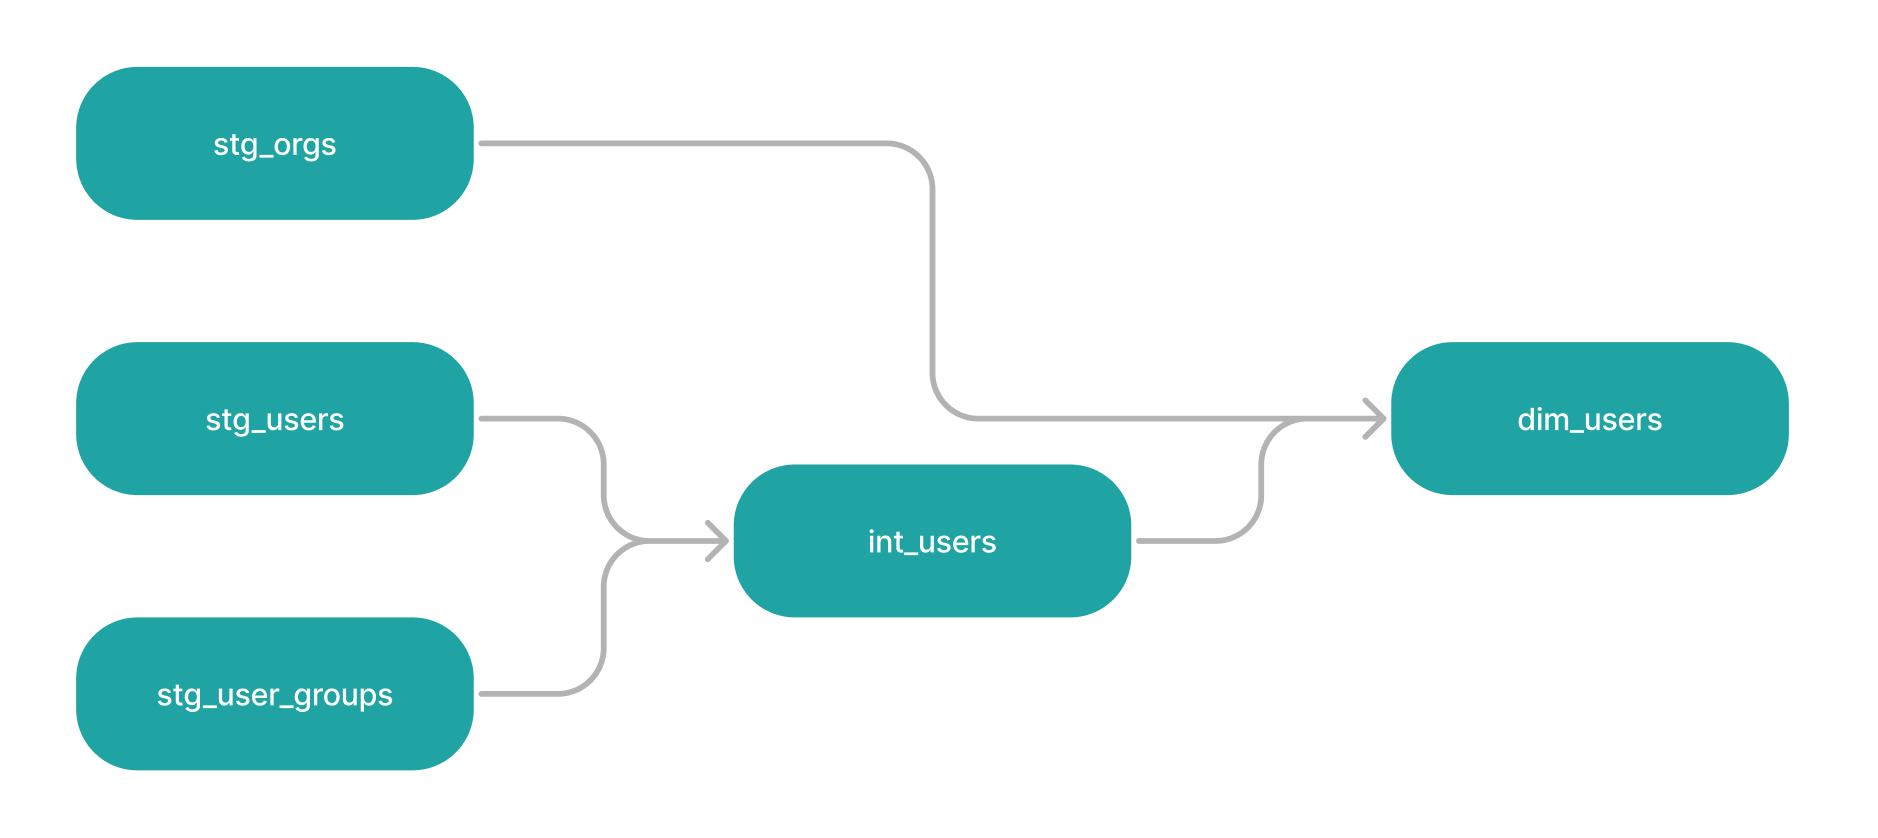

There are four models in this graph, all linearly connected to models downstream. `stg_users` and `stg_user_groups` are parent models of `int_users`, which, in turn, is a parent model of `dim_users` with `stg_orgs` model upstream. 

> Note: the words _upstream_ and _downstream_ are frequently used to refer to the relative position of each model in the DAG.

One key aspect of DAGs is that there are no closed loops. This means that a downstream model, which is the result of earlier models, cannot be joined with an upstream model. That's where the word _acyclic_ comes from. 

Apart from the visual richness of DAGs, their purpose is letting dbt build/update models according to their dependencies. If we don't define a DAG for the four models above, dbt will build them in alphabetically order. This would result in all kinds of red messages and errors. 

To define a DAG in dbt, we will use Jinja templating.

## 6. Jinja Templating in dbt

In the above DAG, `int_users` model is the product of `stg_users` and `stg_user_groups`. We need to specify this relationship in our project, otherwise `dbt run` executes all models alphabetically, which means `int_users` goes first. This will result in an error as its dependencies are not yet materialized. 

Right now, `int_users` model may look like this:

```SQL
SELECT some_column 
  FROM stg_users as su
  JOIN stg_user_groups as sug
    ON su.a = sug.a
```

Now, we will link the three models by turning them into nodes of a DAG using Jinja:

```SQL
SELECT some_column 
  FROM {{ ref("stg_users") }} as su
  JOIN {{ ref("stg_user_groups" )}} as sug
    ON su.a = sug.a
```

Instead of writing the model names directly, we are putting them inside a Jinja function called `ref`. The syntax is `{{ ref("column_name") }}` (mind the spaces and the quotes). When our query is compiled, the the Jinja function is substituted with the actual model name.

> Note that `stg_users` and `stg_user_groups` should exist as `.sql` files in your dbt project. 

Now, when we execute `dbt run`, it will look for the dependencies of each model, connect them and execute them accordingly. 

The `ref` function in Jinja isn't the only one we can use in dbt. In fact, by using Jinja's other functions and features, you can significantly expand the functionality of your SQL statements. Here are some examples:

1. Use Jinja to create variables in model files:

```SQL
{% set status = 'active' %}  -- Define a variable

SELECT *
FROM customers
WHERE status = {{ status }};
```

2. Define variables in model configuration files that exist in `models` directory using the config object.

If we have `models/model_properties.yml` file and it has the following fields:

```YAML
# models/model_properties.yml
version: 2

models:
  - name: my_model
    config:
      target_schema: analytics
```
We can access its fields inside any `.sql` file using Jinja:

```SQL
{% set target_schema = config.target_schema %}

CREATE TABLE {{ target_schema }}.{{ target_table }} AS
...

```

3. Use conditionals and loops (what a surprise this was!):

Conditionals:

```sql
{% if some_condition %}
  SELECT * FROM test_data
{% else %}
  SELECT * FROM production_data
{% endif %}
```

Loops:

```sql
{% for column in ["a", "b", "c", "d"] %}
  {{ column }},
{% endfor %}s
```


4. Create functions in SQL (macros) through Jinja (no, I am not kidding):

Here is the macro:

```sql
{% macro create_table(table_name, columns) %}
  CREATE TABLE {{ table_name }} (
    {% for column in columns %}
      {{ column.name }} {{ column.type }},
    {% endfor %}
  );
{% endmacro %}
```

And here is how you can use it in models:

```sql
{% call create_table('my_customer_table', [
    {'name': 'id', 'type': 'integer'},
    {'name': 'name', 'type': 'varchar(255)'},
    {'name': 'email', 'type': 'varchar(255)'},
]) %}

INSERT INTO {{ my_customer_table }} (id, name, email)
SELECT customer_id, customer_name, customer_email
FROM raw_customers;

```

If you want to learn more about using Jinja in dbt with SQL, check [this page](https://docs.getdbt.com/docs/build/jinja-macros) of dbt docs.

## 7. dbt Tests

Now, a good software developer knows that they need to test their code constantly for bugs and errors. Since dbt turns data engineers into software developers, it offers them a straightforward workflow to use tests, both built-in and custom.

Currently, dbt offers the following four built-in tests:

- `unique` - verify all values are unique
- `not_null` - check missing
- `accepted_values` - verify all values are within a specified list, has a `values` argument
- `relationships` - verifies a connection to a specific table or column, has a `to` and `field` arguments

To specify which tests to use on which columns, we use a YAML file called `model_properties.yml` inside the `models` directory.

> Note: `model_properties.yml` is not a requirement for models to run and it can be named anything. But, if you want to create tests to validate the data feeding into your models through tests, this file is a must. 

Let's see how to use the `not_null` test to check for missing values in the `cut` column of the diamonds table. First, create a `model_properties.yml` file inside `models`:

```
$ touch models/model_properties.yml
```

Inside, paste the following contents:

```YAML
version: 2

models: 
  - name: average_diamond_price_per_group
    columns: 
      - name: cut
        tests: 
          - not_null
```

In the `- name` field under `models`, we are specifying which model are defining properties for. Then, we specify the column and its name. Finally, we write the `tests` field, under which we list the `not_null` test. 

Now, you can use this test to perform data validation before running `dbt run`. The command is `dbt test`:

```
$ dbt test
```

If you receive an error message, it means the test failed and you need to examine the issue in the table and fix it if necessary. 

To implement custom tests or even better, custom reusable tests in dbt, check out this great chapter from the Introduction to dbt course on DataCamp.

## A typical dbt workflow you can follow

To use dbt successfully in your projects, you can use this recommended workflow:

1. Project initialization
- Install `dbt` and create a new project with `dbt init`
2. Configuration
- Choose a database platform for your project
- Configure the database credentials in `profiles.yml` in your home directory.
- Adjust project settings: Modify `dbt_project.yml` for project-level settings (e.g., version, dependencies).
3. Development
- Write model SQL code: Create `.sql` files in the `models` directory for model definitions.
- Write model tests: Create `.yml` files in the `tests` directory for test definitions.
- Test incrementally: Use `dbt test` to run tests frequently during development.
- Debug issues: Use `dbt debug` for troubleshooting.
4. Local Validation (topics we didn't cover)
- Build project: Use dbt build to compile models and tests.
- Run thorough tests: Execute all tests using dbt test.

Additional best practices:
- Version control: Use Git for collaboration and version control (this is a must).
- Documentation: Write human-readable comments in models and tests. You can use `dbt docs generate` later to render the docs of models in a web server (yes, that's possible). 
- Profiling: Utilize dbt's profiling capabilities to catch and fix performance bottlenecks.
- Continuous integration (CI): Integrate dbt with CI/CD pipelines for automated testing and deployment.

## Conclusion and further resources

We have covered many fundamentals in this tutorial but as I mentioned way back in the beginning, `dbt` is a massive tool with many features. It will take you a while to master it to the level that you can comfortable use it in production environments. Why not use these resources to help you achieve that goal faster?

- [Introduction to dbt course on DataCamp](https://www.datacamp.com/courses/introduction-to-dbt)
- [dbt docs (everything about dbt but disorganized information)](https://docs.getdbt.com/)
- [Official courses on dbt by dbt Labs with three levels of difficulty](https://courses.getdbt.com/collections)

Thank you for reading!